In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
iris.keys() # 有哪些 API

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [46]:
print(iris.DESCR) # 資料集描述

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [47]:
iris.target # labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
iris.target_names # 這些 label 對應的名稱

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [49]:
iris.data[:5] # iris 的樣本/資料

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [50]:
iris.feature_names # iris 的特徵名稱

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Example 1

In [51]:
x = iris.data[:, 0].reshape(-1, 1)
x[:3], x[-3:]

(array([[5.1],
        [4.9],
        [4.7]]),
 array([[6.5],
        [6.2],
        [5.9]]))

In [52]:
# 因為 Logistic Regression 只能處理二元分類問題，所以我們將 label 為 0 的資料重新標記為 1，其餘為 0

y = (iris.target == 0).astype(int) # int、np.int32、np.int64
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Logistic Regression

### 使用 LogisticRegression()

In [70]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', C=1, random_state=42)
log_reg.fit(x, y)

log_reg

LogisticRegression(C=1, random_state=42)

In [71]:
log_reg.intercept_, log_reg.coef_

(array([18.5496148]), array([[-3.45845643]]))

In [72]:
log_reg.score(x, y)

0.8933333333333333

In [73]:
x_new = [[3], [4], [5], [5.5], [6.5], [7.5]]
log_reg.predict(x_new)

array([1, 1, 1, 0, 0, 0])

In [57]:
log_reg.predict_proba(x_new)

array([[2.81739607e-04, 9.99718260e-01],
       [8.87335739e-03, 9.91126643e-01],
       [2.21433402e-01, 7.78566598e-01],
       [6.15832312e-01, 3.84167688e-01],
       [9.80741417e-01, 1.92585833e-02],
       [9.99382250e-01, 6.17750219e-04]])

### 使用 SGDClassifier

In [78]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)
sgd_clf

SGDClassifier(alpha=0.001, loss='log_loss', random_state=42)

In [79]:
sgd_clf.fit(x, y)

sgd_clf.intercept_, sgd_clf.coef_

(array([65.80739747]), array([[-11.59179758]]))

In [80]:
sgd_clf.score(x, y)

0.86

In [81]:
sgd_clf.predict(x_new)

array([1, 1, 1, 1, 0, 0])

In [82]:
sgd_clf.predict_proba(x_new)

array([[3.33066907e-14, 1.00000000e+00],
       [3.60765751e-09, 9.99999996e-01],
       [3.90219997e-04, 9.99609780e-01],
       [1.13798925e-01, 8.86201075e-01],
       [9.99928037e-01, 7.19629797e-05],
       [9.99999999e-01, 6.65099572e-10]])

### Decision Boundary

h = b+w1x1 = 0 

=> 

-b/w1 = x1

In [83]:
decision_boundary = -log_reg.intercept_ / log_reg.coef_
decision_boundary

array([[5.36355313]])

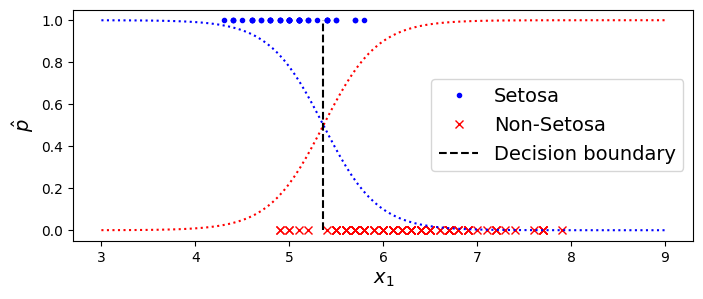

In [92]:
xs = np.linspace(3, 9, 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(xs)

plt.figure(figsize=(8, 3))
plt.plot(x[y==1], y[y==1], 'b.', label='Setosa')
plt.plot(x[y==0], y[y==0], 'rx', label='Non-Setosa')

plt.plot(xs, y_proba[:, 0], "r:")
plt.plot(xs, y_proba[:, 1], "b:")

plt.plot([decision_boundary[0], decision_boundary[0]], [0, 1], 'k--', label='Decision boundary')

plt.xlabel('$x_1$', fontsize=14)
plt.ylabel(r'$\hat{p}$', fontsize=14)
plt.legend(loc='center right', fontsize=14)

plt.show()

### Example 2

In [93]:
x = iris.data[:, :2]
y = (iris.target == 0).astype(int)

In [94]:
x[:3], y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [95]:
log_reg = LogisticRegression(solver='lbfgs', C=1, random_state=42)
log_reg.fit(x, y)
log_reg.intercept_, log_reg.coef_

(array([8.32315487]), array([[-3.38828053,  3.1645602 ]]))

In [96]:
log_reg.score(x, y)

1.0

In [99]:
x_new = [[5.5, 1.7], [6.5, 2.5], [7.5, 6.5]]
log_reg.predict(x_new)

array([0, 0, 1])

In [100]:
log_reg.predict_proba(x_new)

array([[0.99284409, 0.00715591],
       [0.99694912, 0.00305088],
       [0.02986662, 0.97013338]])

#### Decision Boundary

h = b + w1x1 + w2x2 = 0

=>

x2 = -(b+w1x1) / w2

In [102]:
x1_boundary = np.linspace(x.min(axis=0)[0]-0.05, x.max(axis=0)[0]+0.05, 5)
x2_boundary = -(log_reg.intercept_[0] + log_reg.coef_[0][0] * x1_boundary) / log_reg.coef_[0][1]

boundary = np.c_[x1_boundary, x2_boundary]
boundary

array([[4.25      , 1.92034185],
       [5.175     , 2.91073523],
       [6.1       , 3.90112862],
       [7.025     , 4.891522  ],
       [7.95      , 5.88191539]])

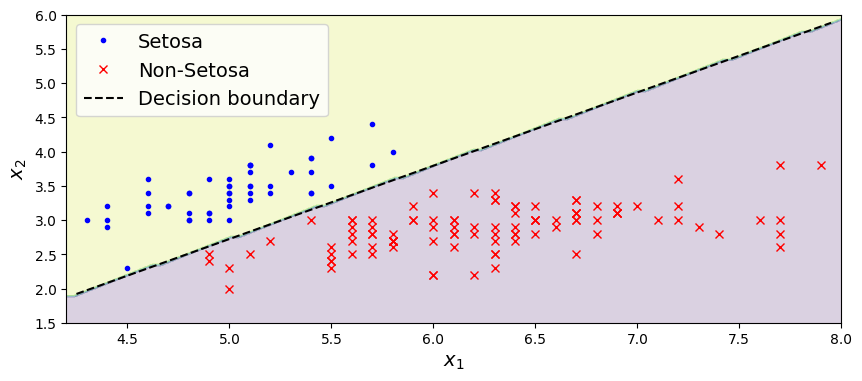

In [112]:
x1s = np.linspace(4.2, 8, 100).reshape(-1, 1)
x2s = np.linspace(1.5, 6, 100).reshape(-1, 1)

x1, x2 = np.meshgrid(x1s, x2s)
x_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = log_reg.predict(x_new)

plt.figure(figsize=(10, 4))
plt.plot(x[y==1][:, 0], x[y==1][:, 1], 'b.', label='Setosa')
plt.plot(x[y==0][:, 0], x[y==0][:, 1], 'rx', label='Non-Setosa')

zz = y_pred.reshape(x1.shape)
plt.contourf(x1, x2, zz, alpha=0.2)
plt.plot(boundary[:, 0], boundary[:, 1], 'k--', label='Decision boundary')

plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend(loc='upper left', fontsize=14)

plt.show()